## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
        
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5, 10, 25]

### EarlyStopping
- monitor: 被監測的資料。
- min_delta: 在被監測的資料中被認為是提升的最小變化， 例如，小於 min_delta 的絕對變化會被認為沒有提升。
- patience: 沒有進步的訓練輪數，在這之後訓練就會被停止。
- verbose: 詳細資訊模式。

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping


results = {}

for time in PATIENCE:
    
    earlystop = EarlyStopping(monitor='val_acc', patience=time, verbose=1)
    
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-patience-%s" % str(time)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4297 - acc: 0.5005 - val_loss: 1.5641 - val_acc: 0.4502
Epoch 7/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3903 - acc: 0.5142 - val_loss: 1.5497 - val_acc: 0.4582
Epoch 8/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.3553 - acc: 0.5276 - val_loss: 1.5330 - val_acc: 0.4584
Epoch 9/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3223 - acc: 0.5409 - val_loss: 1.5286 - val_acc: 0.4635
Epoch 10/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.2930 - acc: 0.5508 - val_loss: 1.5066 - val_acc: 0.4733
Epoch 11/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.2637 - acc: 0.5615 - val_loss: 1.5004 - val_acc: 0.4733
Epoch 12/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2373 - acc: 0.5716 - val_loss: 1.4977 - val_acc: 0.4761
Epoch 13/50
50000/50000 [======

50000/50000 [==============================] - 5s 105us/step - loss: 1.2595 - acc: 0.5642 - val_loss: 1.4842 - val_acc: 0.4790
Epoch 13/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.2322 - acc: 0.5720 - val_loss: 1.4735 - val_acc: 0.4810
Epoch 14/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.2095 - acc: 0.5828 - val_loss: 1.4690 - val_acc: 0.4823
Epoch 15/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.1851 - acc: 0.5917 - val_loss: 1.4681 - val_acc: 0.4858
Epoch 16/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.1603 - acc: 0.6004 - val_loss: 1.4614 - val_acc: 0.4896
Epoch 17/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.1364 - acc: 0.6102 - val_loss: 1.4595 - val_acc: 0.4889
Epoch 18/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.1151 - acc: 0.6186 - val_loss: 1.4597 - val_acc: 0.4860
Epoch 19/50
50000/50000 [==============

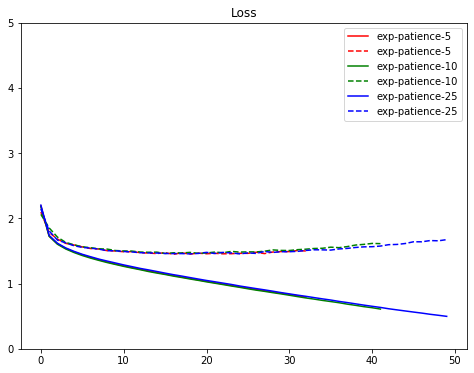

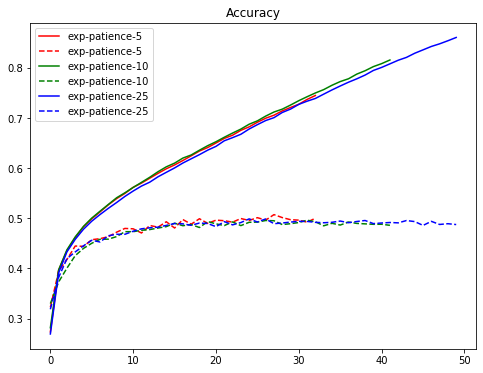

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Result
- 可以發現patience高或低對整體表現不會有太大的差距
- 降低模型訓練時間
- 避免Overfitting